<span style="font-size:2.5em; color:RoyalBlue">CS461 Project: Student Performance</span>
<br><br>
<span style="font-size:1.5em; color:RoyalBlue">Aaron Trefler    | CIN: 305047488</span> <br/>
<span style="font-size:1.5em; color:RoyalBlue">Mohammad Yazdani | CIN: 304390494</span> <br/>
<span style="font-size:1.5em; color:RoyalBlue">Shawn Anderson   | </span> <br/>
<span style="font-size:1.5em; color:RoyalBlue">Kiara Westbrooks | </span> 

# Description of iPython Notebook

The analysis completed in this notebook uses both the Math and Portuguese datasets to address the following:

1) What does the grade distribution look like for Math and Portuguese grades<br><br>
2) To what extent does a student's math grade correlate with their Portuguese grade (determined visually) <br><br>
3) Train two multi-variable linear regression models using common students and features from both datasets (n = 382)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;a) one to predict a student's Math grade<br>
    &nbsp;&nbsp;&nbsp;&nbsp;b) one to predict a student's Portuguese grade<br><br>
4) Determine the importance of different features for predicting a student's Math and Portuguese grades<br><br>
5) Determine which features are more important for determining a student's Math grade verse their Portuguese grade<br>
    &nbsp;&nbsp;&nbsp;&nbsp;a) and vice-versa

# Imports

In [8]:
# numpy and sklearn-additions
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [9]:
# machine learning algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
# plotting
import matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# I. Data Munging

## Import Pandas, and import the data as a dataframes.

In [15]:
import pandas as pd
df_math = pd.read_csv('../data/student/student-mat.csv', sep=';')
df_por = pd.read_csv('../data/student/student-por.csv', sep=';')

print 'math dataframe size: ', np.shape(df)
print 'portuguese dataframe size: ', np.shape(df_por)

df_math.head()

 math dataframe size: 

NameError: name 'df' is not defined

## Extract students common to Math and Portuguese datasets.

In [ ]:
# delete features with different values between groups 
#     features chosen based on instructions accompanying dataset
#     exception: G3 column from both datasets

# math
del df_math['guardian']
del df_math['traveltime']
del df_math['studytime']
del df_math['failures']
del df_math['schoolsup']
del df_math['famsup']
del df_math['paid']
del df_math['activities']
del df_math['higher']
del df_math['romantic']
del df_math['famrel']
del df_math['freetime']
del df_math['goout']
del df_math['Dalc']
del df_math['Walc']
del df_math['health']
del df_math['absences']
del df_math['G1']
del df_math['G2']

# portuguese
del df_por['guardian']
del df_por['traveltime']
del df_por['studytime']
del df_por['failures']
del df_por['schoolsup']
del df_por['famsup']
del df_por['paid']
del df_por['activities']
del df_por['higher']
del df_por['romantic']
del df_por['famrel']
del df_por['freetime']
del df_por['goout']
del df_por['Dalc']
del df_por['Walc']
del df_por['health']
del df_por['absences']
del df_por['G1']
del df_por['G2']

In [ ]:
# create combined dataframe
# selection of features to merge-on 
#     chosen based on instructions accompanying dataset 
df = pd.merge(df_math, df_por,how='inner', \
        on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery",\
            "internet"])

print shape(df)
df.head()

## Convert non-Numerical columns to Numerical

In [ ]:
# for Sex replace F and M by 0 and 1
if(df.sex.dtype == 'object'):
    df.sex = df.sex.map({'F': 0, 'M':1})

# for Family Size replace LE3 and GT3 by 0 and 1
if(df.famsize.dtype == 'object'):
    df.famsize = df.famsize.map({'LE3': 0, 'GT3':1})
    
df.head()

In [ ]:
# dataFrameStr is a column of a DataFrame object
def convertToInt_YesNo(dataFrameStr):
    if(dataFrameStr.dtype == 'object'):
        return dataFrameStr.map({'no': 0, 'yes':1})
    else:
        return dataFrameStr

# dataFrameStr is a column of a DataFrame object
def convertToInt(dataFrameStr):
    uniqueValues = []
    [uniqueValues.append(item) for item in pd.unique(dataFrameStr)]

    intList = []    
    [intList.append(uniqueValues.index(item)) for item in dataFrameStr]
        
    return intList

In [ ]:
print  df.columns.values

In [ ]:
df.school = convertToInt(df.school)
df.address = convertToInt(df.address)
df.Pstatus = convertToInt(df.Pstatus)
df.Mjob = convertToInt(df.Mjob)
df.Fjob = convertToInt(df.Fjob)
df.reason = convertToInt(df.reason)
df.nursery = convertToInt_YesNo(df.nursery)
df.internet = convertToInt_YesNo(df.internet)

df.head()

In [ ]:
df.dtypes

## Rename Math and Portuguese G3 columns.

In [ ]:
# math
df['G3'] = df['G3_x']
del df['G3_x']

# portuguese
df['G3_por'] = df['G3_y']
del df['G3_y']

df.head()

## Visualize Data

### Grade Distribution Histograms

In [7]:
# math
plt.hist(df['G3'], bins=20, normed=False, color='red')
plt.title('Math Grade Distribution')
plt.xlabel("Grade")
plt.ylabel("Student Count")

plt.savefig('DataVis_histogram_math.png')
plt.show()

NameError: name 'df' is not defined

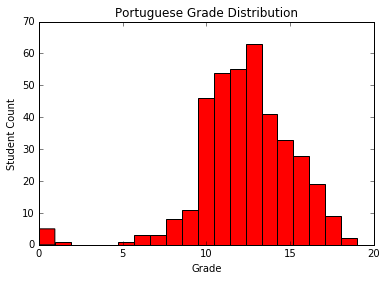

In [605]:
# portuguese
plt.hist(df['G3_por'], bins=20, normed=False, color='red')
plt.title('Portuguese Grade Distribution')
plt.xlabel("Grade")
plt.ylabel("Student Count")

plt.savefig('DataVis_histogram_port.png')
plt.show()

### Math and Portuguese Grade Correlation

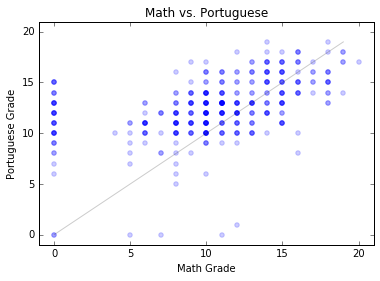

In [606]:
math_G3 = df['G3']
port_G3 = df['G3_por']

# create scatter plot comparing math and portuguese grades
plt.scatter(math_G3, port_G3, alpha=0.2, color='blue')
plt.xlim([-1,21])
plt.ylim([-1,21])
plt.title('Math vs. Portuguese')
plt.xlabel("Math Grade")
plt.ylabel("Portuguese Grade")

# plot perfect correlation line (aka 'x=y') for reference
plt.plot(range(20),range(20), color='black', alpha=0.2)

plt.savefig('DataVis_grade_correlation_port.png')
plt.show()

# II. Feature Engineering

## Create New Features 

In [607]:
features = df.shape[1]
for i in range(features):
    unique_values = pd.unique(df.iloc[:,i].ravel())
    header = df.columns.values[i]
    print header, unique_values

school [0 1]
sex [0 1]
age [18 17 15 16 19 22 20]
address [0 1]
famsize [1 0]
Pstatus [0 1]
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob [0 1 2 3 4]
Fjob [0 1 2 3 4]
reason [0 1 2 3]
nursery [1 0]
internet [0 1]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]
G3_por [11 12 14 13 17 15  7 10 16  9  6  8 18  0  1  5 19]


### Create catigorical binary-features from existing features with more than 2 categorical values

In [608]:
# Convert Feature: Medu
df['Medu_0'] = (df['Medu'] == 0).astype(int)
df['Medu_1'] = (df['Medu'] == 1).astype(int)
df['Medu_2'] = (df['Medu'] == 2).astype(int)
df['Medu_3'] = (df['Medu'] == 3).astype(int)
df['Medu_4'] = (df['Medu'] == 4).astype(int)

In [609]:
# Convert Feature: Fedu
df['Fedu_0'] = (df['Fedu'] == 0).astype(int)
df['Fedu_1'] = (df['Fedu'] == 1).astype(int)
df['Fedu_2'] = (df['Fedu'] == 2).astype(int)
df['Fedu_3'] = (df['Fedu'] == 3).astype(int)
df['Fedu_4'] = (df['Fedu'] == 4).astype(int)

In [610]:
# Convert Feature: Mjob
df['Mjob_0'] = (df['Mjob'] == 0).astype(int)
df['Mjob_1'] = (df['Mjob'] == 1).astype(int)
df['Mjob_2'] = (df['Mjob'] == 2).astype(int)
df['Mjob_3'] = (df['Mjob'] == 3).astype(int)
df['Mjob_4'] = (df['Mjob'] == 4).astype(int)

In [611]:
# Convert Feature: Fjob
df['Fjob_0'] = (df['Fjob'] == 0).astype(int)
df['Fjob_1'] = (df['Fjob'] == 1).astype(int)
df['Fjob_2'] = (df['Fjob'] == 2).astype(int)
df['Fjob_3'] = (df['Fjob'] == 3).astype(int)
df['Fjob_4'] = (df['Fjob'] == 4).astype(int)

In [612]:
# Convert Feature: Reason
df['reason_0'] = (df['reason'] == 0).astype(int)
df['reason_1'] = (df['reason'] == 1).astype(int)
df['reason_2'] = (df['reason'] == 2).astype(int)
df['reason_3'] = (df['reason'] == 3).astype(int)

## Select Features

In [613]:
# function: scale_features
# input: dataframe containing feature values
# output: dataframe containing normalized features

def scale_features(df):
    mean = df.mean(axis = 0)
    std = df.std(axis = 0)
    return (df - mean) / std

In [614]:
df_features = df.copy()

# delete duplicate features and feature-labels
del df_features['Fedu']
del df_features['Medu']
del df_features['Fjob']
del df_features['Mjob']
del df_features['reason']
del df_features['G3']
del df_features['G3_por']

df_features.head()

,school,sex,age,address,famsize,Pstatus,nursery,internet,Medu_0,Medu_1,...,Mjob_4,Fjob_0,Fjob_1,Fjob_2,Fjob_3,Fjob_4,reason_0,reason_1,reason_2,reason_3
0,0,0,18,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,17,0,1,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,15,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,15,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,16,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Normalize Features

In [615]:
# scale features
df_features = scale_features(df_features)

# III. Machine Learning

## Convert to Numpy Arrays

In [616]:
features = df_features.values
# math
labels_regression = df['G3'].values
# portuguese
labels_regression_por = df['G3_por'].values

# add x0 feature column of ones to features matrix
rows = features.shape[0]
features = np.column_stack((np.ones((rows,1)), features))

## Regression

### Multi-Variable Regression

In [617]:
# function: cost_function
# input: total data (y values in last column), theta vec
# output: cost value

def cost_function(A, theta):
    
    # feature matrix
    X = A[:,0:-1]   
    # outcome vector
    y = A[:,-1]
    
    # calculate cost
    cost = np.sum( \
        (1.0 / (2*A.shape[0])) * (np.power(np.dot(X,theta) - y, 2))) 
    
    return cost

In [618]:
# function: gradient
# input: total data matrix (y values in last column), theta vec
# output: gradeint vec (i.e., derivatives) for theta weights 

def compute_gradient(A, theta):
    
    # feature matrix
    X = A[:,0:-1]
    # outcome vector
    y = A[:,-1]
    
    # training examples
    m = X.shape[0]
    # features
    n = X.shape[1]
    
    # calculate gradient  
    error = (np.dot(X,theta) - y)   
    gradient = (1.0 / m) * np.dot(np.transpose(error), X)
    gradient = np.transpose(gradient)
                 
    return gradient

In [619]:
# function: gradient_descent
# input: total data matrix (y values in last column), iterations of gradient descent, alpha (learning rate)
# output: trained theta weight parameters

def gradient_descent(A, num_iter, alpha):
    
    # feature matrix
    X = A[:,0:-1]
    # outcome vector
    y = A[:,-1]
    
    # training examples
    m = X.shape[0]
    # features
    n = X.shape[1]
    
    # create initial theta vector (i.e., all weights = 0)
    theta = np.zeros(X.shape[1])
    
    for i in range(num_iter):
        
        # calculate gradients
        gradient_vec = compute_gradient(A, theta)
    
        # update theta values
        theta = theta - (alpha * gradient_vec)
    
    # return updated values
    return theta

### Math

In [620]:
# combine features and lables
total_data = np.column_stack((features, labels_regression))

# create initial theta vector (i.e., all weights = 0)
theta = np.zeros(features.shape[1])

# call cost_function
cost_beg = cost_function(total_data, theta)

# run gradient descent
theta = gradient_descent(total_data, 100, .3)

# call cost_function
cost_end = cost_function(total_data, theta)

print "Cost before gradient descent: ", cost_beg
print "Cost after gradient descent:  ", cost_end

Cost before gradient descent:  64.9057591623
Cost after gradient descent:   9.38874352208


#### Learning Curve - Math

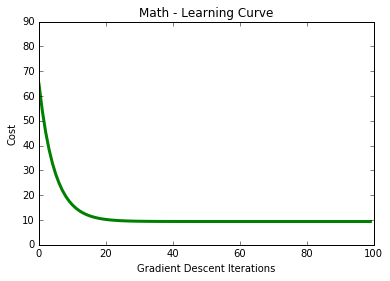

In [621]:
#%matplotlib inline 

# Run gradient descent while keeping track of cost at each iteration

# combine features and lables
total_data = np.column_stack((features, labels_regression))

# number of iteration for gradient descent
num_iter = 100

# alpha value
alpha = 0.1
    
# training examples
m = features.shape[0]
# features
n = features.shape[1]
    
# create initial theta vector (i.e., all weights = 0)
theta_math = np.zeros(n)

# initialize cost function array
cost = np.zeros(num_iter)
    
for i in range(num_iter):
       
    # calculate cost
    cost[i] = cost_function(total_data, theta_math)
    
    # calculate gradients
    gradient_vec = compute_gradient(total_data, theta_math)
    
    # update theta values
    theta_math = theta_math - (alpha * gradient_vec)

    
# plot learning curve
plt.plot(cost, color='green', linewidth=3)
plt.title('Math - Learning Curve')
plt.ylabel('Cost')
plt.xlabel('Gradient Descent Iterations')
plt.ylim([0,90])
plt.savefig('MultiVar_learning_curve_math.png')
plt.show()

#### Rank Theta Weights - Math

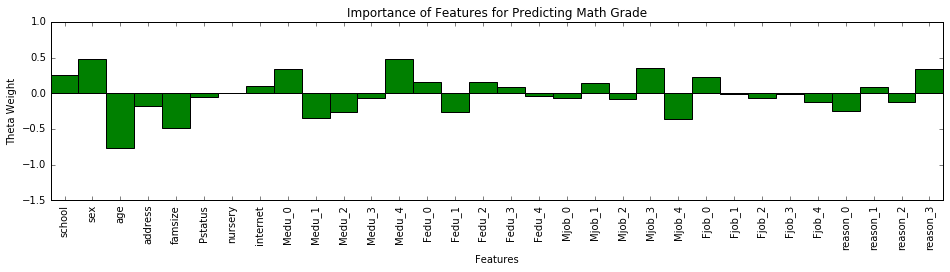

In [622]:
#%matplotlib inline
#%matplotlib osx

# create figure
plt.figure(num=None, figsize=(16,4))

x = range(n-1)
y = theta_math[1:]

# bar graph parameters
bar_width = 1
index = np.arange(n-1)
plt.bar(x, y, bar_width, color='green')

# bar graph setup
plt.xlabel('Features')
plt.ylabel('Theta Weight')
plt.title('Importance of Features for Predicting Math Grade')
locs, labels = plt.xticks(index + (bar_width/2.0), df_features.columns.values)
plt.setp(labels, rotation=90)
plt.ylim([-1.5,1])
plt.xlim([0,np.size(x)])
plt.gcf().subplots_adjust(bottom=0.28)

# plot
plt.savefig('MultiVar_features_math.png')
plt.show()

## Portuguese

In [623]:
# combine features and lables
total_data = np.column_stack((features, labels_regression_por))

# create initial theta vector (i.e., all weights = 0)
theta = np.zeros(features.shape[1])

# call cost_function
cost_beg = cost_function(total_data, theta)

# run gradient descent
theta = gradient_descent(total_data, 100, .3)

# call cost_function
cost_end = cost_function(total_data, theta)

print "Cost before gradient descent: ", cost_beg
print "Cost after gradient descent:  ", cost_end

Cost before gradient descent:  82.6479057592
Cost after gradient descent:   3.48312077768


#### Learning Curve - Portuguese

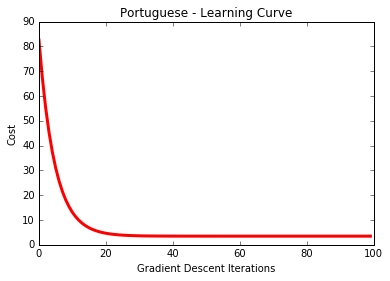

In [624]:
#%matplotlib inline 

# Run gradient descent while keeping track of cost at each iteration

# combine features and lables
total_data = np.column_stack((features, labels_regression_por))

# number of iteration for gradient descent
num_iter = 100

# alpha value
alpha = 0.1
    
# training examples
m = features.shape[0]
# features
n = features.shape[1]
    
# create initial theta vector (i.e., all weights = 0)
theta_por = np.zeros(n)

# initialize cost function array
cost = np.zeros(num_iter)
    
for i in range(num_iter):
       
    # calculate cost
    cost[i] = cost_function(total_data, theta_por)
    
    # calculate gradients
    gradient_vec = compute_gradient(total_data, theta_por)
    
    # update theta values
    theta_por = theta_por - (alpha * gradient_vec)

    
# plot learning curve
plt.plot(cost, color='red', linewidth=3)
plt.title('Portuguese - Learning Curve')
plt.ylabel('Cost')
plt.xlabel('Gradient Descent Iterations')
plt.ylim([0,90])
plt.savefig('MultiVar_learning_curve_port.png')
plt.show()

#### Rank Theta Weights - Portuguese

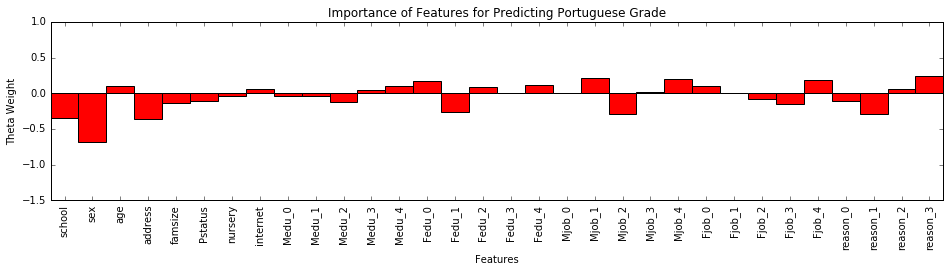

In [625]:
#%matplotlib inline
#%matplotlib osx

# create figure
plt.figure(num=None, figsize=(16,4))

x = range(n-1)
y = theta_por[1:]

# bar graph parameters
bar_width = 1
index = np.arange(n-1)

plt.bar(x, y, bar_width, color='red')

# bar graph setup
plt.xlabel('Features')
plt.ylabel('Theta Weight')
plt.title('Importance of Features for Predicting Portuguese Grade')
locs, labels = plt.xticks(index + (bar_width/2.0), df_features.columns.values)
plt.setp(labels, rotation=90)
plt.ylim([-1.5,1])
plt.xlim([0,np.size(x)])
plt.gcf().subplots_adjust(bottom=0.28)

# plot
plt.savefig('MultiVar_features_port.png')
plt.show()

## Math vs. Portuguese

#### Math > Portuguese

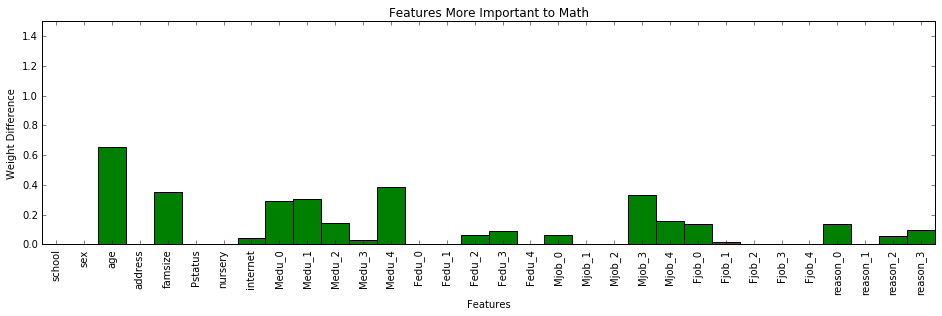

In [626]:
# create theta difference vector
baseline_math = theta_math[0]
baseline_por = theta_por[0]
theta_diff = (np.absolute(theta_math)) - (np.absolute(theta_por))
theta_diff[theta_diff < 0] = 0

# create figure
plt.figure(num=None, figsize=(16,4))

x = range(n-1)
y = theta_diff[1:]

# bar graph parameters
bar_width = 1
index = np.arange(n-1)

plt.bar(x, y, bar_width, color='green')

# bar graph setup
plt.xlabel('Features')
plt.ylabel('Weight Difference')
plt.title('Features More Important to Math')
locs, labels = plt.xticks(index + (bar_width/2.0), df_features.columns.values)
plt.setp(labels, rotation=90)
plt.ylim([0,1.5])
plt.xlim([0,np.size(x)])

# plot
plt.savefig('MultiVar_features_diff_mathGr.png', bbox_inches='tight')
plt.show()

#### Portuguese > Math

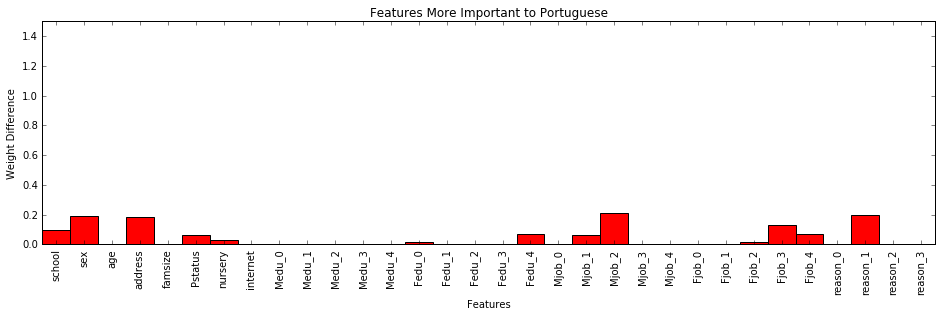

In [627]:
# create theta difference vector
baseline_math = theta_math[0]
baseline_por = theta_por[0]
theta_diff = (np.absolute(theta_por)) - (np.absolute(theta_math))
theta_diff[theta_diff < 0] = 0
# create figure
plt.figure(num=None, figsize=(16,4))

x = range(n-1)
y = theta_diff[1:]

# bar graph parameters
bar_width = 1
index = np.arange(n-1)

plt.bar(x, y, bar_width, color='red')

# bar graph setup
plt.xlabel('Features')
plt.ylabel('Weight Difference')
plt.title('Features More Important to Portuguese')
locs, labels = plt.xticks(index + (bar_width/2.0), df_features.columns.values)
plt.setp(labels, rotation=90)
plt.xlim([0,np.size(x)])
plt.ylim([0,1.5])

# plot
plt.savefig('MultiVar_features_diff_portGr.png', bbox_inches='tight')
plt.show()